In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect


In [4]:
# create engine to hawaii.sqlite
base_path = "Resources/hawaii.sqlite"
engine = create_engine(f'sqlite:///{base_path}')
conn = engine.connect()
engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [5]:
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()


['measurement', 'station']

In [6]:
# Save references. Map classes and create a session
M = Base.classes.measurement
S = Base.classes.station

session = Session(engine)

In [7]:
# View all of the classes that automap found
first_row = session.query(M).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x9392598>,
 'id': 1,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'prcp': 0.08,
 'tobs': 65.0}

In [8]:
# View all of the classes that automap found
first_row = session.query(S).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x9392a30>,
 'longitude': -157.8168,
 'elevation': 3.0,
 'id': 1,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'name': 'WAIKIKI 717.2, HI US'}

In [9]:
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('measurement')
columns

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [10]:
inspector = inspect(engine)
inspector.get_table_names()
columns2 = inspector.get_columns('station')
columns2

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [11]:
# Use `engine.execute` to select and display the first 10 rows from the measurement table
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [12]:
# Use `engine.execute` to select and display the first 10 rows from the station table
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Precipitation Analysis

In [13]:
# Total dates
session.query(func.count(M.date)).all()

[(19550)]

In [14]:
# Find the most recent date in the data set.
session.query(M.date).order_by(M.date.desc()).first()

('2017-08-23')

In [15]:
print(dt.date.today())
print(dt.date(2017, 8 ,23))

2021-05-12
2017-08-23


In [16]:
# date 1 year ago from 8/23/2017
year_ago = dt.date(2017, 8 ,23) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

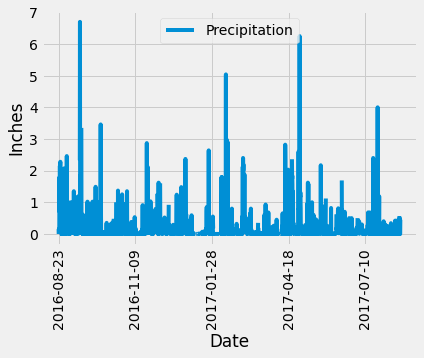

In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores

prcp_results = session.query(M.date, M.prcp).\
    filter(M.date >= year_ago).\
    order_by(M.date).all()
#prcp_results


# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(prcp_results, columns = ['Date', 'Precipitation'])
#df.head()

# Sort the dataframe by date
df = df.sort_values('Date')
#df.head()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x = 'Date', y = 'Precipitation', rot=90)
plt.ylabel('Inches')
#plt.tight_layout()
plt.show()

In [32]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [33]:
# Design a query to calculate the total number stations in the dataset
session.query(M.station).distinct().count()


9

In [34]:
# List the stations and the counts in descending order.
station_count = session.query(M.station, func.count(M.station)). \
    group_by(M.station).order_by(func.count(M.station).desc()).all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [35]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_81_low = session.query(M.station, func.min(M.tobs)). \
    filter_by(station='USC00519281').all()
station_81_low

[('USC00519281', 54.0)]

In [36]:
station_81_high = session.query(M.station, func.max(M.tobs)). \
    filter_by(station='USC00519281').all()
station_81_high

[('USC00519281', 85.0)]

In [37]:
station_81_avg = session.query(M.station, func.avg(M.tobs)). \
    filter_by(station='USC00519281').all()
station_81_avg

[('USC00519281', 71.66378066378067)]

In [40]:
#find the latest date for 'USC...81'
session.query(M.date). \
    filter_by(station='USC00519281'). \
    order_by(M.date.desc()).first()

('2017-08-18')

In [41]:
#create variable for 1 year ago from 'USC...81's latest date. 
year_ago2 = dt.date(2017, 8 ,18) - dt.timedelta(days=365)
year_ago2

datetime.date(2016, 8, 18)

In [42]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

tobs2_results = session.query(M.date, M.tobs). \
    filter_by(station='USC00519281'). \
    filter(M.date >= year_ago2).all()

df2 = pd.DataFrame(tobs2_results, columns = ['Date', 'Tempature'])
df2

,Date,Tempature
0,2016-08-18,80.0
1,2016-08-19,79.0
2,2016-08-20,81.0
3,2016-08-21,79.0
4,2016-08-22,78.0
...,...,...
352,2017-08-14,77.0
353,2017-08-15,77.0
354,2017-08-16,76.0
355,2017-08-17,76.0


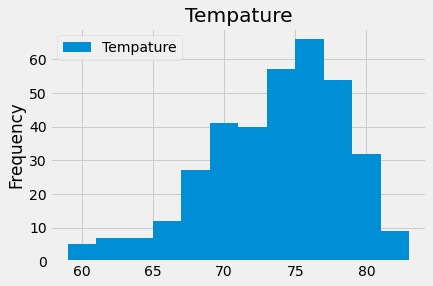

In [43]:
df2.hist(column='Tempature', by=None, grid=True, xlabelsize=None, xrot=0, ylabelsize=None, yrot=None, \
        ax=None, sharex=False, sharey=False, figsize=None, layout=None, bins=12, backend=None, legend=True)
plt.ylabel('Frequency')
plt.show()

In [66]:
#join tables

sel = [M.station, S.name, M.date, M.prcp, M.tobs, S.elevation, S.latitude, S.longitude,]
join_tables = session.query(*sel).filter(M.station == S.station).all()

join_tables

df3 = pd.DataFrame(join_tables)

df3.head()

,station,name,date,prcp,tobs,elevation,latitude,longitude
0,USC00519397,"WAIKIKI 717.2, HI US",2010-01-01,0.08,65.0,3.0,21.2716,-157.8168
1,USC00519397,"WAIKIKI 717.2, HI US",2010-01-02,0.00,63.0,3.0,21.2716,-157.8168
2,USC00519397,"WAIKIKI 717.2, HI US",2010-01-03,0.00,74.0,3.0,21.2716,-157.8168
3,USC00519397,"WAIKIKI 717.2, HI US",2010-01-04,0.00,76.0,3.0,21.2716,-157.8168
4,USC00519397,"WAIKIKI 717.2, HI US",2010-01-06,NaN,73.0,3.0,21.2716,-157.8168


# Close session

In [67]:
# Close Session
session.close()